# Sentiment Analysis
## Projects Concepts
### Approaching a Project

Mengembangkan aplikasi dalam skala besar tidaklah mudah. Jangan langsung terjun dan mencoba untuk menyelesaikan semuanya sekaligus. Seperti petuah bijak berikut:

"A goal without a plan is just a wish."

Mulailah dengan rencana! Berikut beberapa langkah yang sebaiknya diikuti ketika mengembangkan aplikasi:

- buatlah outline langkah demi langkah yang dibutuhkan untuk membangun aplikasi
- kemudian tulis pseudocode
- kembangkan sintaks satu per satu

Dan sebelum submit, pastikan:

- semua bugs sudah dibasmi
- cek rubrik dan pastikan proyek kamu sudah memenuhi semua requirements

### Project Overview

DATA COLUMNS:
marketplace       - 2 letter country code of the marketplace where the review was written.
customer_id       - Random identifier that can be used to aggregate reviews written by a single author.
review_id         - The unique ID of the review.
product_id        - The unique Product ID the review pertains to. In the multilingual dataset the reviews
for the same product in different countries can be grouped by the same product_id.
product_parent    - Random identifier that can be used to aggregate reviews for the same product.
product_title     - Title of the product.
product_category  - Broad product category that can be used to group reviews
(also used to group the dataset into coherent parts).
star_rating       - The 1-5 star rating of the review.
helpful_votes     - Number of helpful votes.
total_votes       - Number of total votes the review received.
vine              - Review was written as part of the Vine program.
verified_purchase - The review is on a verified purchase.
review_headline   - The title of the review.
review_body       - The review text.
review_date       - The date the review was written.

DATA FORMAT
Tab ('\t') separated text file, without quote or escape characters.
First line in each file is header; 1 line corresponds to 1 record.

In this assignment, you have to demonstrate:

- How to load and prepare text for modeling.
- How to develop a RNN for text classification sentiment analysis with Tensorflow and improve model performance.


## Setup

In [86]:
!pip install tensorflow-datasets
!pip install tensorflow
import numpy as np
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

     -------------------------------------- 444.0/444.0 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 8.7 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 9.9 MB/s eta 0:00:00
     -------------------------------------- 151.5/151.5 kB 8.8 MB/s eta 0:00:00


## Importing Libraries

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import csv
%matplotlib inline


In [33]:
data = pd.read_csv ('amazon_reviews_us_Video_DVD_v1_00.tsv',
                    sep='\t',
                    error_bad_lines=False)

C:\Users\indria.hazhiah\AppData\Local\Temp\ipykernel_18948\395863639.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv ('amazon_reviews_us_Video_DVD_v1_00.tsv',
b'Skipping line 1890: expected 15 fields, saw 22\nSkipping line 6666: expected 15 fields, saw 22\n'
b'Skipping line 111408: expected 15 fields, saw 22\n'
b'Skipping line 170181: expected 15 fields, saw 22\nSkipping line 170231: expected 15 fields, saw 22\n'
b'Skipping line 256196: expected 15 fields, saw 22\n'
b'Skipping line 295037: expected 15 fields, saw 22\n'
b'Skipping line 548974: expected 15 fields, saw 22\nSkipping line 551265: expected 15 fields, saw 22\nSkipping line 551973: expected 15 fields, saw 22\n'
b'Skipping line 619923: expected 15 fields, saw 22\n'
b'Skipping line 763610: expected 15 fields, saw 22\n'
b'Skipping line 798928: expected 15 fields, saw 22\n'
b'Skipping line 859446: expected 15 field

In [35]:
data.shape

(5049291, 15)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049291 entries, 0 to 5049290
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   marketplace        object 
 1   customer_id        int64  
 2   review_id          object 
 3   product_id         object 
 4   product_parent     int64  
 5   product_title      object 
 6   product_category   object 
 7   star_rating        float64
 8   helpful_votes      float64
 9   total_votes        float64
 10  vine               object 
 11  verified_purchase  object 
 12  review_headline    object 
 13  review_body        object 
 14  review_date        object 
dtypes: float64(3), int64(2), object(10)
memory usage: 577.8+ MB


In [40]:
numerical_columns = list(data.select_dtypes(include=['int64']).columns.values) + list(data.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(data.select_dtypes(include=['object']))

# cetak variabel yang numerik
numerical_columns

['customer_id',
 'product_parent',
 'star_rating',
 'helpful_votes',
 'total_votes']

In [41]:
# cetak variabel yang kategorikal
categorical_columns

['marketplace',
 'review_id',
 'product_id',
 'product_title',
 'product_category',
 'vine',
 'verified_purchase',
 'review_headline',
 'review_body',
 'review_date']

In [37]:
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,27288431,R33UPQQUZQEM8,B005T4ND06,400024643,Yoga for Movement Disorders DVD: Rebuilding St...,Video DVD,5.0,3.0,3.0,N,Y,This was a gift for my aunt who has Parkinson'...,This was a gift for my aunt who has Parkinson'...,2015-08-31
1,US,13722556,R3IKTNQQPD9662,B004EPZ070,685335564,Something Borrowed,Video DVD,5.0,0.0,0.0,N,Y,Five Stars,Teats my heart out.,2015-08-31
2,US,20381037,R3U27V5QMCP27T,B005S9EKCW,922008804,Les Miserables (2012) [Blu-ray],Video DVD,5.0,1.0,1.0,N,Y,Great movie!,Great movie.,2015-08-31
3,US,24852644,R2TOH2QKNK4IOC,B00FC1ZCB4,326560548,Alien Anthology and Prometheus Bundle [Blu-ray],Video DVD,5.0,0.0,1.0,N,Y,Amazing,My husband was so excited to receive these as ...,2015-08-31
4,US,15556113,R2XQG5NJ59UFMY,B002ZG98Z0,637495038,Sex and the City 2,Video DVD,5.0,0.0,0.0,N,Y,Five Stars,Love this series.,2015-08-31


## Deskriptif Statistik untuk atribut numerikal


In [42]:
# deskriptif statistik untuk data latih
data[numerical_columns].describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,5.049291e+06,5.049291e+06,5.049287e+06,5.049287e+06,5.049287e+06
mean,3.094148e+07,4.998088e+08,4.301129e+00,2.964645e+00,4.562956e+00
std,1.524062e+07,2.882336e+08,1.181560e+00,1.911466e+01,2.204417e+01
min,1.000100e+04,1.658000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.667348e+07,2.494515e+08,4.000000e+00,0.000000e+00,0.000000e+00
50%,3.171011e+07,5.020783e+08,5.000000e+00,0.000000e+00,1.000000e+00
75%,4.522751e+07,7.515318e+08,5.000000e+00,2.000000e+00,4.000000e+00
max,5.309659e+07,9.999959e+08,5.000000e+00,2.092800e+04,2.298200e+04


## Mengetahui jumlah data untuk masing-masing katagori

In [45]:
data.groupby('verified_purchase').count()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,review_headline,review_body,review_date
verified_purchase,,,,,,,,,,,,,,
N,1750697,1750697,1750697,1750697,1750697,1750697,1750697,1750697,1750697,1750697,1750697,1750665,1750694,1750447
Y,3298590,3298590,3298590,3298590,3298590,3298590,3298590,3298590,3298590,3298590,3298590,3298553,3298566,3298408


In [46]:
data.groupby('product_category').count()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
product_category,,,,,,,,,,,,,,
2004-05-05,1,1,1,1,1,1,0,0,0,0,0,0,0,0
2005-05-21,1,1,1,1,1,1,0,0,0,0,0,0,0,0
2012-01-09,1,1,1,1,1,1,0,0,0,0,0,0,0,0
2013-02-09,1,1,1,1,1,1,0,0,0,0,0,0,0,0
Video DVD,5049287,5049287,5049287,5049287,5049287,5049287,5049287,5049287,5049287,5049287,5049287,5049218,5049260,5048855


dari sini terlihat ada data yang tidak sesuai dan harus di cleansing

# Cleansing Data

### Memastikan tidak ada missing values pada Kolom Kategorikal
--------------------------------------------
Pada keterangan dataset yang dilampirkan, missing values pada data ditandai dengan label "unknown" pada beberapa kolom dengan tipe kategorikal. Oleh karena, kolom kategorikal yang memuat label "unknown" akan diganti menjadi nan untuk menandai adanya missing values (unstandard missing values)

In [47]:
# Mengetahui jumlah "unknown" di setiap atribut
data[
    data[categorical_columns]=='unknown'
].count().sort_values(ascending=False)

review_headline      8
marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_body          0
review_date          0
dtype: int64

 review_headline menjadi kolom kategorikal yang banyak mengandung missing values

In [48]:
# Mengganti "unknown" pada data latih
data[
    data[categorical_columns]=="unknown"
] = np.nan

In [49]:
# Mengetahui jumlah "unknown" di setiap atribut
data[
    data[categorical_columns]=='unknown'
].count().sort_values(ascending=False)

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [50]:
# Mencetak semua nilai unik pada masing-masing kolom kategori
for cat_col in categorical_columns:
    print("Nilai unik untuk kolom ", cat_col.upper())
    print(data[cat_col].unique())
    print('='*30)

Nilai unik untuk kolom  MARKETPLACE
['US']
Nilai unik untuk kolom  REVIEW_ID
['R33UPQQUZQEM8' 'R3IKTNQQPD9662' 'R3U27V5QMCP27T' ... 'R3UIB7DM8VZSR8'
 'R2YTBM6RDVNS4F' 'R5GBJG2FG9B6U']
Nilai unik untuk kolom  PRODUCT_ID
['B005T4ND06' 'B004EPZ070' 'B005S9EKCW' ... '6302459060' '6303593569'
 '6302275806']
Nilai unik untuk kolom  PRODUCT_TITLE
["Yoga for Movement Disorders DVD: Rebuilding Strength, Balance, and Flexibility for Parkinson's Disease and Dystonia"
 'Something Borrowed' 'Les Miserables (2012) [Blu-ray]' ...
 'Passages of Marriage'
 "The Films of Merchant Ivory (James Ivory's The Europeans)"
 'Steadfast Tin Soldier']
Nilai unik untuk kolom  PRODUCT_CATEGORY
['Video DVD' '2013-02-09' '2012-01-09' '2005-05-21' '2004-05-05']
Nilai unik untuk kolom  VINE
['N' 'Y' nan]
Nilai unik untuk kolom  VERIFIED_PURCHASE
['Y' 'N' nan]
Nilai unik untuk kolom  REVIEW_HEADLINE
["This was a gift for my aunt who has Parkinson's ..." 'Five Stars'
 'Great movie!' ...
 'Deals with many new subplots, bu

In [57]:
# mengganti nilai uniq pada PRODUCT_CATEGORY
data['product_category'].replace('2005-05-21','Video DVD',inplace=True)
data['product_category'].replace('2013-02-09','Video DVD',inplace=True)
data['product_category'].replace('2012-01-09','Video DVD',inplace=True)
data['product_category'].replace('2004-05-05','Video DVD',inplace=True)

In [62]:
# Mencetak semua nilai unik pada masing-masing kolom kategori
for cat_col in categorical_columns:
    print("Nilai unik untuk kolom ", cat_col.upper())
    print(data[cat_col].unique())
    print('--'*40)

Nilai unik untuk kolom  MARKETPLACE
['US']
--------------------------------------------------------------------------------
Nilai unik untuk kolom  REVIEW_ID
['R33UPQQUZQEM8' 'R3IKTNQQPD9662' 'R3U27V5QMCP27T' ... 'R3UIB7DM8VZSR8'
 'R2YTBM6RDVNS4F' 'R5GBJG2FG9B6U']
--------------------------------------------------------------------------------
Nilai unik untuk kolom  PRODUCT_ID
['B005T4ND06' 'B004EPZ070' 'B005S9EKCW' ... '6302459060' '6303593569'
 '6302275806']
--------------------------------------------------------------------------------
Nilai unik untuk kolom  PRODUCT_TITLE
["Yoga for Movement Disorders DVD: Rebuilding Strength, Balance, and Flexibility for Parkinson's Disease and Dystonia"
 'Something Borrowed' 'Les Miserables (2012) [Blu-ray]' ...
 'Passages of Marriage'
 "The Films of Merchant Ivory (James Ivory's The Europeans)"
 'Steadfast Tin Soldier']
--------------------------------------------------------------------------------
Nilai unik untuk kolom  PRODUCT_CATEGORY
['V

In [63]:
# Mencetak semua nilai unik pada setiap atribut numerikal
for num_col in numerical_columns:
    print("Nilai unik untuk kolom ", num_col.upper())
    print(data[num_col].unique())
    print('='*30)

Nilai unik untuk kolom  CUSTOMER_ID
[27288431 13722556 20381037 ... 53050813 53068969 53087071]
Nilai unik untuk kolom  PRODUCT_PARENT
[400024643 685335564 922008804 ... 791383040 378312266 240491966]
Nilai unik untuk kolom  STAR_RATING
[ 5.  4.  1.  3.  2. nan]
Nilai unik untuk kolom  HELPFUL_VOTES
[3.0000e+00 0.0000e+00 1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00
 7.0000e+00 9.0000e+00 3.2000e+01 1.2000e+01 6.0000e+00 3.5000e+01
 1.3900e+02 5.0000e+00 1.1000e+01 1.6000e+01 1.5000e+01 1.7000e+01
 9.5000e+01 4.2000e+01 1.0000e+01 5.3000e+01 2.6000e+01 3.0000e+01
 2.2000e+01 3.8000e+01 4.0000e+01 2.9000e+01 8.4000e+01 3.4000e+01
 2.4000e+01 2.1000e+01 2.5000e+01 1.9000e+01 4.4000e+01 1.3000e+01
 1.4000e+01 5.4000e+01 6.7000e+01 7.4000e+01 1.4400e+02 6.2500e+02
 5.7000e+01 2.3000e+01 9.8000e+01 2.0000e+01 1.2800e+02 5.8000e+01
 5.5000e+01 1.8000e+01 2.7000e+01 2.8000e+01 1.0000e+02 7.1000e+01
 7.2000e+01 5.2000e+01 3.1000e+01 6.9000e+01 3.3000e+01 3.6000e+01
 1.7500e+02 1.1500e+02 4.3000

[3.0000e+00 0.0000e+00 1.0000e+00 2.0000e+00 5.0000e+00 4.0000e+00
 7.0000e+00 1.0000e+01 6.0000e+00 9.0000e+00 3.9000e+01 1.5000e+01
 8.6000e+01 3.7000e+01 1.7000e+01 8.0000e+00 1.4100e+02 2.8000e+01
 1.1000e+01 2.1000e+01 1.8000e+01 2.3000e+01 1.6000e+01 1.9000e+01
 1.4000e+01 1.0300e+02 5.3000e+01 1.2000e+01 5.0000e+01 3.3000e+01
 1.3000e+01 2.0000e+01 5.5000e+01 3.2000e+01 3.8000e+01 2.4000e+01
 4.4000e+01 3.4000e+01 9.7000e+01 3.6000e+01 2.7000e+01 3.1000e+01
 2.6000e+01 6.0000e+01 2.2000e+01 1.3900e+02 4.8000e+01 2.5000e+01
 4.9000e+01 2.9000e+01 7.0000e+01 4.1000e+01 8.2000e+01 7.4000e+01
 3.0000e+01 1.6400e+02 1.0200e+02 6.6700e+02 6.6000e+01 1.0100e+02
 1.6500e+02 4.5000e+01 4.3000e+01 6.7000e+01 5.8000e+01 5.1000e+01
 1.1200e+02 1.0500e+02 1.1100e+02 9.0000e+01 8.3000e+01 5.2000e+01
 4.0000e+01 3.5000e+01 7.8000e+01 1.8400e+02 4.6000e+01 1.5700e+02
 1.1700e+02 1.7500e+02 6.4000e+01 9.8000e+01 9.2000e+01 1.1400e+02
 6.2000e+01 6.5000e+01 2.4900e+02 1.7700e+02 6.3000e+01 5.6000

## Merangkum total missing values (nan) values

In [64]:
# missing values pada data train
print("Jumlah nan missing values atribut kategori = ",data[categorical_columns].isnull().sum().sum())
print("Jumlah nan missing values atribut numerikal = ",data[numerical_columns].isnull().sum().sum())


Jumlah nan missing values atribut kategori =  556
Jumlah nan missing values atribut numerikal =  12


Masing-masing terdapat missing values.


## Penanganan Missing Values
Untuk data kategorikal, missing values akan diisi dengan modus dari atribut X, sedangkan untuk data numerikal missing values akan diisi dengan median dari atribut Z.

### Pisahkan data yang bertipe kategorik dan numerik

In [65]:
 #categorical data
data_categorical = data[categorical_columns]

# numerical data
data_numerical = data[numerical_columns]

### Input untuk filling nan pada atribut kategorikal

In [68]:
# Machine learning process
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# features analysis libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.decomposition import PCA

In [70]:
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_numerical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')


## Fit data training 

In [71]:
#Categorical
# fit dengan data training
imputer_categorical.fit(data_categorical)

SimpleImputer(strategy='most_frequent')

In [72]:
#numerical
# fit dengan data training
imputer_numerical.fit(data_numerical)

SimpleImputer(strategy='most_frequent')

In [75]:
# transform ke data latih
data_categorical = imputer_categorical.transform(data_categorical)
data_numerical = imputer_numerical.transform(data_numerical)

# buat hasil array ke dalam dataframe
data_categorical = pd.DataFrame(data_categorical,columns=categorical_columns)
data_numerical = pd.DataFrame (data_numerical,columns=numerical_columns)

# Concate categorical columns dengan numerical columns
data = pd.concat([data_categorical,data_numerical],axis=1)

#Check kalau masih ada missing values terlewat
# missing values pada data train
print("Jumlah nan missing values atribut kategori = ",data[categorical_columns].isnull().sum().sum())
print("Jumlah nan missing values atribut numerikal = ",data[numerical_columns].isnull().sum().sum())


Jumlah nan missing values atribut kategori =  0
Jumlah nan missing values atribut numerikal =  0


In [77]:
data.head()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,marketplace,review_id,product_id,product_title,product_category,vine,verified_purchase,review_headline,review_body,review_date
0,27288431.0,400024643.0,5.0,3.0,3.0,US,R33UPQQUZQEM8,B005T4ND06,Yoga for Movement Disorders DVD: Rebuilding St...,Video DVD,N,Y,This was a gift for my aunt who has Parkinson'...,This was a gift for my aunt who has Parkinson'...,2015-08-31
1,13722556.0,685335564.0,5.0,0.0,0.0,US,R3IKTNQQPD9662,B004EPZ070,Something Borrowed,Video DVD,N,Y,Five Stars,Teats my heart out.,2015-08-31
2,20381037.0,922008804.0,5.0,1.0,1.0,US,R3U27V5QMCP27T,B005S9EKCW,Les Miserables (2012) [Blu-ray],Video DVD,N,Y,Great movie!,Great movie.,2015-08-31
3,24852644.0,326560548.0,5.0,0.0,1.0,US,R2TOH2QKNK4IOC,B00FC1ZCB4,Alien Anthology and Prometheus Bundle [Blu-ray],Video DVD,N,Y,Amazing,My husband was so excited to receive these as ...,2015-08-31
4,15556113.0,637495038.0,5.0,0.0,0.0,US,R2XQG5NJ59UFMY,B002ZG98Z0,Sex and the City 2,Video DVD,N,Y,Five Stars,Love this series.,2015-08-31


## Eksplorasi Data (Visualisasi
### Berapa persentase setiap nilai pada kepuasan pembelian?

In [79]:
data['verified_purchase'].value_counts()

Y    3298594
N    1750697
Name: verified_purchase, dtype: int64

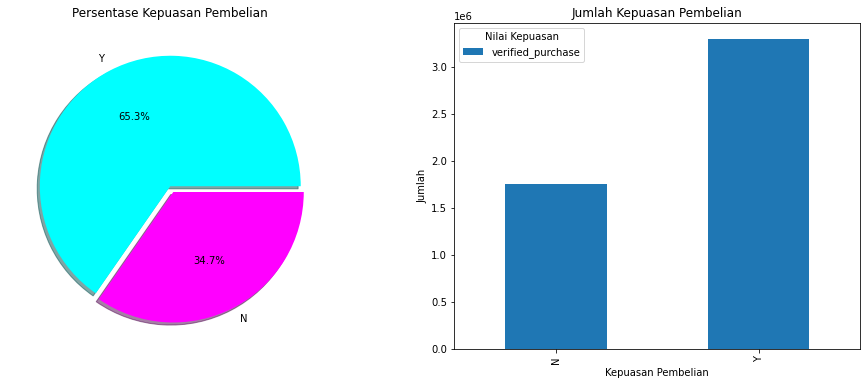

In [80]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "berlangganan deposito"
data['verified_purchase'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0,0.05], 
    cmap='cool',
    shadow=True,
    ax=ax[0]
)
ax[0].set_title('Persentase Kepuasan Pembelian')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
data.groupby('verified_purchase').agg({'verified_purchase':'count'}).plot(
    kind='bar',
    ax=ax[1]
)
ax[1].set_title('Jumlah Kepuasan Pembelian')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Kepuasan Pembelian')
ax[1].legend(title='Nilai Kepuasan')

## Setup 

Import matplotlib and create a helper function to plot graphs:

In [88]:
tfds.disable_progress_bar()
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.svm import LinearSVC
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

#### Menghilangkan kolom yang tidak diperlukan

In [125]:
rating = ['low','neutral','high']

def rating_y(y):
    if y<=2:
        return rating[0]
    elif y>=4:
        return rating[2]
    else:
        return rating[1]


data['rating_cat'] = data['star_rating'].apply(rating_y)

In [126]:
data_fix=data.drop(['marketplace', 'review_id',
                      'product_id','product_parent',
                      'product_category','helpful_votes',
                       'total_votes','vine',
                       'verified_purchase','review_headline',
                     'review_date','customer_id',
                      'product_title',], axis=1)

In [127]:
data_fix=data_fix.head(10000)
data_fix.head()

,star_rating,review_body,rating_cat
0,5.0,This was a gift for my aunt who has Parkinson'...,high
1,5.0,Teats my heart out.,high
2,5.0,Great movie.,high
3,5.0,My husband was so excited to receive these as ...,high
4,5.0,Love this series.,high


Untuk mempermudah training data dibatasi hanya 10000 data yang digunakan

In [128]:

stemmer = SnowballStemmer("english")
tokenizer = RegexpTokenizer("[a-z']+")

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [stemmer.stem(t) for t in tokens] 

def get_tf(data_fix, use_idf, max_df=1.0, min_df=1, ngram_range=(1,1)):
    if use_idf:
        m = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    else:
        m = CountVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    
    d = m.fit_transform(data_fix.values.astype('U'))
    
    return m, d
tf_m, tf_d = get_tf(data_fix['review_body'], use_idf=False, max_df=0.90, min_df=10)
tfidf_m, tfidf_d = get_tf(data_fix['review_body'], use_idf=True, max_df=0.90, min_df=10)


C:\Users\indria.hazhiah\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


In [129]:
n_topics = 10

def get_lda(data_fix, topics):
    m = LatentDirichletAllocation(n_components=topics, n_jobs=-1, learning_method='online').fit(data_fix)
    d = m.transform(data_fix)
    return m, d

def get_kmeans(data_fix, k, scale=True):
    if scale:
        s = MinMaxScaler()
        data = s.fit_transform(data_fix)
    
    m = KMeans(n_clusters=k).fit(data_fix)
    d = m.predict(data_fix)
    return m, d        

lda_m, lda_d = get_lda(tf_d, n_topics)
kmean_m, kmean_d = get_kmeans(tfidf_d, n_topics, scale=False)

In [130]:
def show_topics(model, feature_names, n_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_words - 1:-1]]))
    print()

In [131]:
def show_cluster_topics(cluster_labels, tf_matrix, feature_names, n_words):
    d = pd.DataFrame(tf_matrix.toarray())
    d['c'] = cluster_labels
    d = d.groupby('c').sum().T
    
    for col in d:
        top_n = d[col].nlargest(n_words).index.tolist()
        print("Cluster #%d:" % col)
        print(", ".join([feature_names[i]
                for i in top_n]))
    print()

In [132]:
print("Top 15 stemmed words per topic in LDA model\n")
show_topics(lda_m, tf_m.get_feature_names(), 15)

Top 15 stemmed words per topic in LDA model

Topic #0:
dvd, ray, blu, disc, releas, new, miss, special, play, look, featur, player, wasn't, case, time
Topic #1:
br, film, scene, make, act, peopl, s, star, becaus, end, whi, actual, man, bad, west
Topic #2:
seri, season, love, episod, watch, fan, set, like, start, end, wait, charact, can't, final, collect
Topic #3:
product, veri, nice, thought, famili, expect, qualiti, great, sound, everyth, year, entertain, pictur, son, understand
Topic #4:
thank, work, perfect, right, beauti, play, use, american, workout, day, rememb, want, amazon, abl, especi
Topic #5:
time, awesom, favorit, long, arriv, boy, song, quick, sever, night, ship, women, man, place, mani
Topic #6:
movi, stori, like, veri, better, video, make, classic, wonder, fun, look, version, just, best, happi
Topic #7:
movi, great, love, good, veri, funni, seri, best, kid, watch, fast, time, stori, favorit, excel
Topic #8:
excel, doe, war, life, world, present, histori, documentari, fol

C:\Users\indria.hazhiah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [133]:
print("Top 15 stemmed words per cluster in Kmeans model\n")
show_cluster_topics(kmean_d, tfidf_d, tfidf_m.get_feature_names(), 15)


Top 15 stemmed words per cluster in Kmeans model

Cluster #0:
dvd, great, seller, receiv, advertis, love, time, recommend, manner, movi, play, thank, condit, veri, watch
Cluster #1:
love, great, veri, seri, like, watch, good, film, enjoy, season, stori, best, just, time, awesom
Cluster #2:
excel, complaint, movi, seri, servic, great, product, qualiti, film, video, price, dvd, veri, stori, condit
Cluster #3:
good, movi, veri, seri, play, buy, real, product, like, stori, realli, time, pretti, season, qualiti
Cluster #4:
movi, great, love, good, watch, favorit, time, like, enjoy, best, veri, classic, awesom, funni, fun
Cluster #5:
love, movi, seri, great, kid, son, watch, old, daughter, just, absolut, stori, fun, classic, time
Cluster #6:
br, film, movi, like, time, watch, just, good, veri, great, realli, way, make, stori, end
Cluster #7:
great, movi, product, seri, price, classic, condit, film, famili, collect, qualiti, job, buy, stori, work
Cluster #8:
fast, deliveri, ship, great, item,

In [134]:
def get_svd(data_fix, components):
    svd = TruncatedSVD(n_components=components).fit(data_fix)
    o = pd.DataFrame(svd.transform(data_fix), columns=range(0,components))
    return svd,o

def get_tsne(data_fix, components, perplexity):
    tsne = TSNE(n_components=components, perplexity=perplexity, n_iter=1000)
    o = pd.DataFrame(tsne.fit_transform(data_fix), columns=range(0,components))
    return tsne,o

svd_v, svd_m = get_svd(tfidf_d, 50)
tnse_v, tsne_m = get_tsne(svd_m, 2, 25)

lda_c = lda_d.argmax(axis=1)

C:\Users\indria.hazhiah\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\indria.hazhiah\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

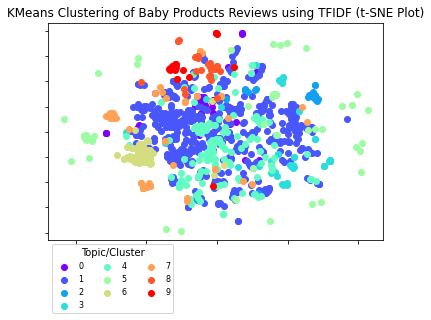

In [135]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

def plot_scatter_2d(x, y, c, sample_size, title):
    df = pd.DataFrame({'x': x, 'y': y, 'c': c}).sample(sample_size)
    l = len(np.unique(c))
    
    ax = plt.subplot(111)
    colors = cm.rainbow(np.linspace(0, 1, l))
                                   
    for c in range(0,l):
        qq = df[df['c']==c]
        ax.scatter(qq['x'], qq['y'],c=colors[c], label=c)
    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), title='Topic/Cluster')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(title)
    plt.show()

get_ipython().run_line_magic('matplotlib', 'inline')
plot_scatter_2d(tsne_m[0], tsne_m[1], kmean_d, 1000, 'KMeans Clustering of Baby Products Reviews using TFIDF (t-SNE Plot)')


In [136]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_d,
                                                    data_fix['rating_cat'],test_size=0.3)

In [137]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
def calculate_cv(X, y):
    results = {
        'lr': [],
        'svm': [],
        'nb': [],
        'combined': []
    }
    lm = LogisticRegression()
    svm = LinearSVC()
    nb = MultinomialNB()
    vc = VotingClassifier([('lm', lm), ('svm', svm), ('nb', nb)])
    
    for c in rating:
        y_adj = np.array(y==c)
        results['lr'].append((cross_val_score(lm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['svm'].append((cross_val_score(svm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['nb'].append((cross_val_score(nb, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['combined'].append((cross_val_score(vc, X, y_adj, cv=10, scoring='accuracy').mean(), c))
    return results

cv_scores = calculate_cv(X_test, y_test)

print("Model accuracy predictions\n")
for m,s in cv_scores.items():
    for ss in s:
        print("{M} model ({R} rating): {S:.1%}".format(M=m.upper(), R=ss[1], S=ss[0]))
    print()


Model accuracy predictions

LR model (low rating): 93.0%
LR model (neutral rating): 94.2%
LR model (high rating): 87.9%

SVM model (low rating): 93.2%
SVM model (neutral rating): 94.3%
SVM model (high rating): 89.7%

NB model (low rating): 92.9%
NB model (neutral rating): 94.2%
NB model (high rating): 87.3%

COMBINED model (low rating): 93.0%
COMBINED model (neutral rating): 94.2%
COMBINED model (high rating): 88.1%



In [138]:
def get_lr(x, y):
    models = []
    for c in rating:
        y_adj = np.array(y==c)
        lm = LogisticRegression()
        lm_f = lm.fit(x, y_adj)
        models.append(lm_f)
    return models

lr_m = get_lr(X_train, y_train)

In [139]:
get_ipython().run_line_magic('matplotlib', 'inline')

def plot_coef(title, model, feature_names, n_words):
    v = []
    for topic_idx, topic in enumerate(model.coef_):
        [v.append([feature_names[i], model.coef_.item(i)]) for i in topic.argsort()[:-n_words - 1:-1]]
        [v.append([feature_names[i], model.coef_.item(i)]) for i in topic.argsort()[0:n_words]]
    df = pd.DataFrame(v, columns=['Term','Coefficient']).sort_values(by='Coefficient',ascending=False)
    df['c'] = df['Coefficient']>0
    ax = df.plot(x='Term', y='Coefficient', kind='barh', color=df['c'].map({True: 'g', False: 'r'}), grid=True, legend=False,
           title=title)
    ax.set_xlabel("Coefficient")

C:\Users\indria.hazhiah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\indria.hazhiah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\indria.hazhiah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


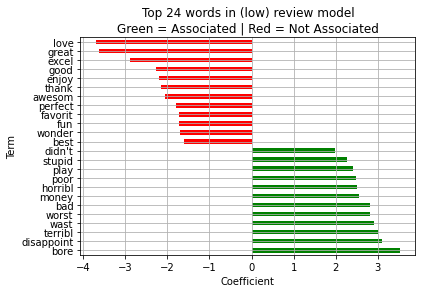

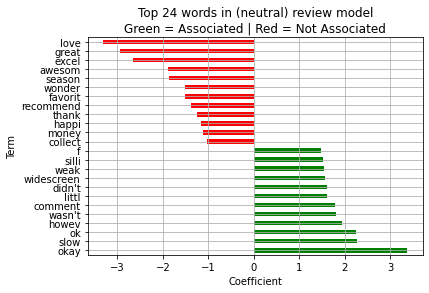

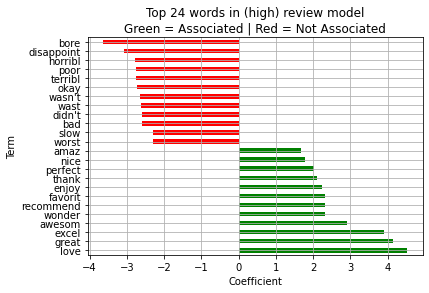

In [140]:
n_terms = 12
for c in range(0,len(rating)):
    plot_coef('Top {N} words in ({R}) review model\nGreen = Associated | Red = Not Associated'.format(N=n_terms*2, R=rating[c]), 
              lr_m[c], tfidf_m.get_feature_names(), n_terms)

In [141]:
def test_review(text):
    test_str = [text]
    test_new = tfidf_m.transform(test_str)

    print('Review text: "{R}"\n'.format(R=test_str[0]))
    print('Model Prediction')
    for m in range(0,3):
        print('Model ({M}): {P:.1%}'.format(M=rating[m], P=lr_m[m].predict_proba(test_new)[0][1]))

## Coba Review Text Kepuasan Pembeli

In [142]:
test_review('I bought a DVD is reject and I returned it when it arrived.')

Review text: "I bought a DVD is reject and I returned it when it arrived."

Model Prediction
Model (low): 23.5%
Model (neutral): 3.9%
Model (high): 75.9%


In [143]:
test_review('I really like a DVD, good cover, and the price was cheap I am glad to bought it')

Review text: "I really like a DVD, good cover, and the price was cheap I am glad to bought it"

Model Prediction
Model (low): 9.3%
Model (neutral): 6.2%
Model (high): 84.0%
